# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [4]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

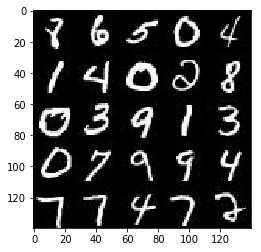

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

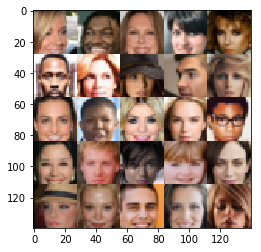

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/shahzadsalim/anaconda3/envs/dog-project/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [8]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [77]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="same")
        x1 = tf.maximum(alpha * x1, x1)

        #print("discriminator 1")

        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        #print("discriminator 2")
       

        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)

        #print("discriminator 3")

        x = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

        #print("discriminator 4")

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [78]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('generator', reuse=not is_train):
        #print("generator 1")

        x = tf.layers.dense(z, 7*7*512)
        
        x = tf.reshape(x, (-1,7, 7, 512))
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)

        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        #print("generator 2")

        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        #print("generator 3")

        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, padding="same")
        #print("generator 4")

       
        out = tf.tanh(logits)
        
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [79]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #print("modeloss_1")

    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    #print("modeloss_2")

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    #print("modeloss_3")

    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    #print("modeloss_4")

    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    #print("modeloss_5")

    
    
    return d_loss, g_loss
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [80]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #print("modelot_1")
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]
    #print("modelot_2")

    
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
        #print("modelot_3")

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
        #print("modelot_4")

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [81]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [83]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    images_count, image_width, image_height, image_channels = data_shape

    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                #print("here 2")

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7340... Generator Loss: 1.5315
Epoch 1/2... Discriminator Loss: 0.5793... Generator Loss: 1.7889
Epoch 1/2... Discriminator Loss: 2.3248... Generator Loss: 2.9333
Epoch 1/2... Discriminator Loss: 0.8218... Generator Loss: 1.8933
Epoch 1/2... Discriminator Loss: 2.4784... Generator Loss: 0.2050
Epoch 1/2... Discriminator Loss: 0.9894... Generator Loss: 1.2080
Epoch 1/2... Discriminator Loss: 1.5183... Generator Loss: 1.3950
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 0.7586
Epoch 1/2... Discriminator Loss: 1.1349... Generator Loss: 0.8655
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 0.7597


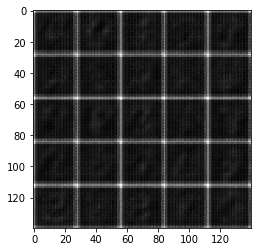

Epoch 1/2... Discriminator Loss: 1.2270... Generator Loss: 0.7342
Epoch 1/2... Discriminator Loss: 1.2339... Generator Loss: 0.8651
Epoch 1/2... Discriminator Loss: 1.2726... Generator Loss: 1.5027
Epoch 1/2... Discriminator Loss: 1.3649... Generator Loss: 0.7889
Epoch 1/2... Discriminator Loss: 1.2545... Generator Loss: 1.4137
Epoch 1/2... Discriminator Loss: 1.3307... Generator Loss: 0.6330
Epoch 1/2... Discriminator Loss: 1.1871... Generator Loss: 1.2306
Epoch 1/2... Discriminator Loss: 1.2005... Generator Loss: 0.7782
Epoch 1/2... Discriminator Loss: 1.1144... Generator Loss: 1.1534
Epoch 1/2... Discriminator Loss: 1.2048... Generator Loss: 0.8029


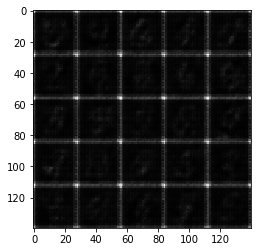

Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 0.6573
Epoch 1/2... Discriminator Loss: 1.0156... Generator Loss: 0.9642
Epoch 1/2... Discriminator Loss: 1.1922... Generator Loss: 1.7281
Epoch 1/2... Discriminator Loss: 0.9260... Generator Loss: 1.4571
Epoch 1/2... Discriminator Loss: 1.2022... Generator Loss: 0.6464
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.7750
Epoch 1/2... Discriminator Loss: 1.0606... Generator Loss: 0.8597
Epoch 1/2... Discriminator Loss: 1.0037... Generator Loss: 1.5634
Epoch 1/2... Discriminator Loss: 1.0768... Generator Loss: 0.8972
Epoch 1/2... Discriminator Loss: 0.9637... Generator Loss: 1.0047


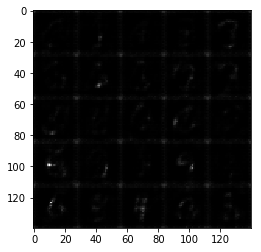

Epoch 1/2... Discriminator Loss: 0.9099... Generator Loss: 1.4552
Epoch 1/2... Discriminator Loss: 0.9706... Generator Loss: 1.8454
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 0.9210... Generator Loss: 1.6125
Epoch 1/2... Discriminator Loss: 0.9475... Generator Loss: 1.0138
Epoch 1/2... Discriminator Loss: 0.9369... Generator Loss: 1.0757
Epoch 1/2... Discriminator Loss: 0.8538... Generator Loss: 1.2362
Epoch 1/2... Discriminator Loss: 0.9051... Generator Loss: 0.9475
Epoch 1/2... Discriminator Loss: 1.3303... Generator Loss: 0.5420
Epoch 1/2... Discriminator Loss: 0.9532... Generator Loss: 0.9407


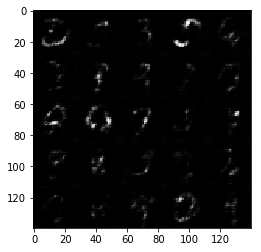

Epoch 1/2... Discriminator Loss: 0.9517... Generator Loss: 0.9911
Epoch 1/2... Discriminator Loss: 0.9142... Generator Loss: 1.2457
Epoch 1/2... Discriminator Loss: 0.9515... Generator Loss: 0.9496
Epoch 1/2... Discriminator Loss: 0.9855... Generator Loss: 2.1115
Epoch 1/2... Discriminator Loss: 0.9898... Generator Loss: 0.8960
Epoch 1/2... Discriminator Loss: 1.0486... Generator Loss: 0.8072
Epoch 1/2... Discriminator Loss: 1.0739... Generator Loss: 0.7993
Epoch 1/2... Discriminator Loss: 0.9418... Generator Loss: 1.0042
Epoch 1/2... Discriminator Loss: 1.0247... Generator Loss: 0.9867
Epoch 1/2... Discriminator Loss: 1.1558... Generator Loss: 0.7059


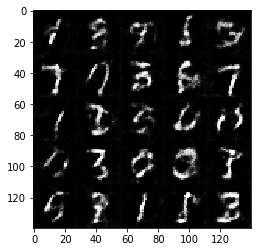

Epoch 1/2... Discriminator Loss: 0.8659... Generator Loss: 1.5391
Epoch 1/2... Discriminator Loss: 1.1490... Generator Loss: 0.7909
Epoch 1/2... Discriminator Loss: 1.2146... Generator Loss: 0.6909
Epoch 1/2... Discriminator Loss: 1.1624... Generator Loss: 0.6709
Epoch 1/2... Discriminator Loss: 1.0979... Generator Loss: 1.7723
Epoch 1/2... Discriminator Loss: 1.0909... Generator Loss: 0.8658
Epoch 1/2... Discriminator Loss: 1.0350... Generator Loss: 1.4478
Epoch 1/2... Discriminator Loss: 1.1323... Generator Loss: 0.7356
Epoch 1/2... Discriminator Loss: 1.0538... Generator Loss: 1.1415
Epoch 1/2... Discriminator Loss: 1.0106... Generator Loss: 1.4537


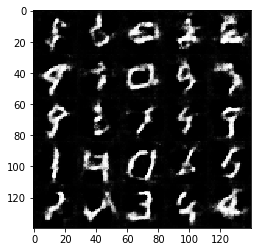

Epoch 1/2... Discriminator Loss: 1.2002... Generator Loss: 0.6370
Epoch 1/2... Discriminator Loss: 1.1966... Generator Loss: 1.7166
Epoch 1/2... Discriminator Loss: 1.0464... Generator Loss: 0.9638
Epoch 1/2... Discriminator Loss: 1.1048... Generator Loss: 0.8037
Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 1.4607
Epoch 1/2... Discriminator Loss: 1.0763... Generator Loss: 1.2216
Epoch 1/2... Discriminator Loss: 1.0575... Generator Loss: 0.9608
Epoch 1/2... Discriminator Loss: 1.0456... Generator Loss: 0.9369
Epoch 1/2... Discriminator Loss: 1.1870... Generator Loss: 0.8784
Epoch 1/2... Discriminator Loss: 1.2008... Generator Loss: 1.7457


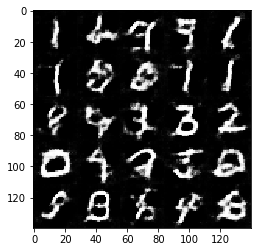

Epoch 1/2... Discriminator Loss: 0.9557... Generator Loss: 1.3181
Epoch 1/2... Discriminator Loss: 0.9895... Generator Loss: 1.2383
Epoch 1/2... Discriminator Loss: 0.9894... Generator Loss: 1.1326
Epoch 1/2... Discriminator Loss: 1.0548... Generator Loss: 1.1853
Epoch 1/2... Discriminator Loss: 1.0389... Generator Loss: 0.9187
Epoch 1/2... Discriminator Loss: 1.0945... Generator Loss: 1.0120
Epoch 1/2... Discriminator Loss: 1.0352... Generator Loss: 1.0333
Epoch 1/2... Discriminator Loss: 1.0124... Generator Loss: 0.9051
Epoch 1/2... Discriminator Loss: 1.0506... Generator Loss: 0.9004
Epoch 1/2... Discriminator Loss: 1.0585... Generator Loss: 0.7851


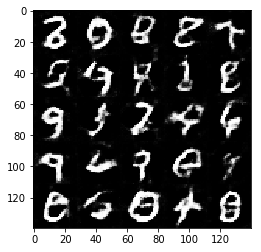

Epoch 1/2... Discriminator Loss: 1.0857... Generator Loss: 0.8833
Epoch 1/2... Discriminator Loss: 1.1154... Generator Loss: 0.9232
Epoch 1/2... Discriminator Loss: 0.9931... Generator Loss: 1.3380
Epoch 1/2... Discriminator Loss: 0.9523... Generator Loss: 1.1038
Epoch 1/2... Discriminator Loss: 1.0959... Generator Loss: 1.1776
Epoch 1/2... Discriminator Loss: 1.2713... Generator Loss: 0.6219
Epoch 1/2... Discriminator Loss: 1.0540... Generator Loss: 0.7830
Epoch 1/2... Discriminator Loss: 0.9840... Generator Loss: 1.0984
Epoch 1/2... Discriminator Loss: 1.0369... Generator Loss: 0.8002
Epoch 1/2... Discriminator Loss: 1.3823... Generator Loss: 0.5294


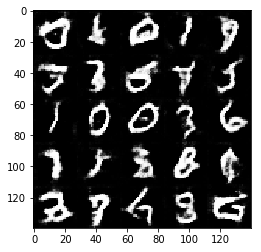

Epoch 1/2... Discriminator Loss: 1.0536... Generator Loss: 1.1077
Epoch 1/2... Discriminator Loss: 1.0295... Generator Loss: 1.4397
Epoch 1/2... Discriminator Loss: 0.9530... Generator Loss: 1.2671
Epoch 2/2... Discriminator Loss: 0.9819... Generator Loss: 1.3496
Epoch 2/2... Discriminator Loss: 0.9768... Generator Loss: 1.4758
Epoch 2/2... Discriminator Loss: 0.9544... Generator Loss: 1.2879
Epoch 2/2... Discriminator Loss: 1.0511... Generator Loss: 0.8201
Epoch 2/2... Discriminator Loss: 1.1711... Generator Loss: 0.7323
Epoch 2/2... Discriminator Loss: 1.1141... Generator Loss: 0.7352
Epoch 2/2... Discriminator Loss: 0.9390... Generator Loss: 1.3909


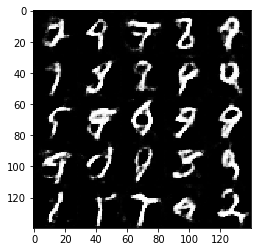

Epoch 2/2... Discriminator Loss: 1.0331... Generator Loss: 0.9973
Epoch 2/2... Discriminator Loss: 1.0832... Generator Loss: 0.7624
Epoch 2/2... Discriminator Loss: 1.1217... Generator Loss: 0.7368
Epoch 2/2... Discriminator Loss: 1.1743... Generator Loss: 0.7420
Epoch 2/2... Discriminator Loss: 0.9163... Generator Loss: 1.2442
Epoch 2/2... Discriminator Loss: 1.0811... Generator Loss: 0.8990
Epoch 2/2... Discriminator Loss: 1.1859... Generator Loss: 0.6814
Epoch 2/2... Discriminator Loss: 1.0362... Generator Loss: 0.9409
Epoch 2/2... Discriminator Loss: 1.0639... Generator Loss: 0.7713
Epoch 2/2... Discriminator Loss: 1.1958... Generator Loss: 0.6365


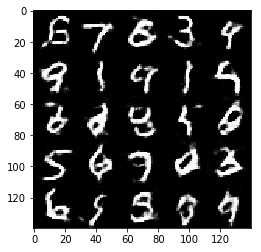

Epoch 2/2... Discriminator Loss: 1.0895... Generator Loss: 1.6598
Epoch 2/2... Discriminator Loss: 0.9296... Generator Loss: 1.1186
Epoch 2/2... Discriminator Loss: 1.0162... Generator Loss: 1.6165
Epoch 2/2... Discriminator Loss: 0.8964... Generator Loss: 1.1569
Epoch 2/2... Discriminator Loss: 1.0518... Generator Loss: 0.8416
Epoch 2/2... Discriminator Loss: 0.9597... Generator Loss: 1.0285
Epoch 2/2... Discriminator Loss: 0.9198... Generator Loss: 1.2510
Epoch 2/2... Discriminator Loss: 0.9193... Generator Loss: 1.0018
Epoch 2/2... Discriminator Loss: 0.9682... Generator Loss: 1.0215
Epoch 2/2... Discriminator Loss: 0.8690... Generator Loss: 1.6643


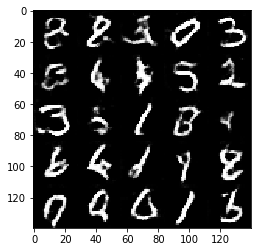

Epoch 2/2... Discriminator Loss: 0.9844... Generator Loss: 1.4439
Epoch 2/2... Discriminator Loss: 0.9964... Generator Loss: 1.4285
Epoch 2/2... Discriminator Loss: 0.8497... Generator Loss: 1.4144
Epoch 2/2... Discriminator Loss: 1.0218... Generator Loss: 1.1927
Epoch 2/2... Discriminator Loss: 0.9275... Generator Loss: 1.1926
Epoch 2/2... Discriminator Loss: 0.9672... Generator Loss: 1.0398
Epoch 2/2... Discriminator Loss: 0.8898... Generator Loss: 1.1063
Epoch 2/2... Discriminator Loss: 0.9312... Generator Loss: 0.9446
Epoch 2/2... Discriminator Loss: 0.8686... Generator Loss: 1.4421
Epoch 2/2... Discriminator Loss: 0.8093... Generator Loss: 1.4194


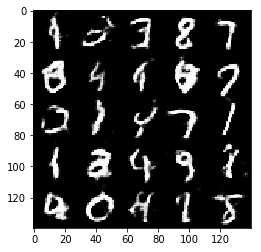

Epoch 2/2... Discriminator Loss: 0.8559... Generator Loss: 1.1264
Epoch 2/2... Discriminator Loss: 1.3516... Generator Loss: 0.5045
Epoch 2/2... Discriminator Loss: 1.0070... Generator Loss: 0.8907
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 1.6579
Epoch 2/2... Discriminator Loss: 1.1821... Generator Loss: 0.6532
Epoch 2/2... Discriminator Loss: 0.8837... Generator Loss: 1.3152
Epoch 2/2... Discriminator Loss: 0.9481... Generator Loss: 1.0006
Epoch 2/2... Discriminator Loss: 0.9101... Generator Loss: 1.0019
Epoch 2/2... Discriminator Loss: 0.8202... Generator Loss: 1.3877
Epoch 2/2... Discriminator Loss: 1.3033... Generator Loss: 0.5661


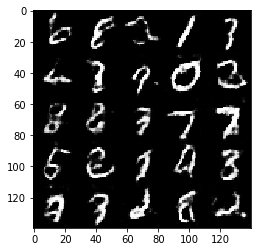

Epoch 2/2... Discriminator Loss: 0.8346... Generator Loss: 1.3513
Epoch 2/2... Discriminator Loss: 0.9539... Generator Loss: 0.9938
Epoch 2/2... Discriminator Loss: 0.8419... Generator Loss: 1.3037
Epoch 2/2... Discriminator Loss: 1.0660... Generator Loss: 0.7930
Epoch 2/2... Discriminator Loss: 1.0488... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 1.0566... Generator Loss: 0.8060
Epoch 2/2... Discriminator Loss: 1.0402... Generator Loss: 0.7911
Epoch 2/2... Discriminator Loss: 1.1892... Generator Loss: 0.6357
Epoch 2/2... Discriminator Loss: 1.2779... Generator Loss: 0.5647
Epoch 2/2... Discriminator Loss: 0.8571... Generator Loss: 1.1613


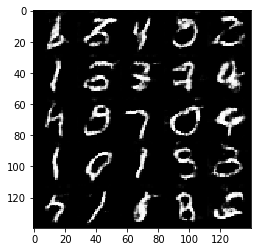

Epoch 2/2... Discriminator Loss: 0.8894... Generator Loss: 1.8308
Epoch 2/2... Discriminator Loss: 0.8756... Generator Loss: 1.1462
Epoch 2/2... Discriminator Loss: 0.8848... Generator Loss: 1.1579
Epoch 2/2... Discriminator Loss: 1.2476... Generator Loss: 0.5954
Epoch 2/2... Discriminator Loss: 0.8068... Generator Loss: 1.2091
Epoch 2/2... Discriminator Loss: 0.9076... Generator Loss: 1.9870
Epoch 2/2... Discriminator Loss: 1.1246... Generator Loss: 0.7427
Epoch 2/2... Discriminator Loss: 0.8331... Generator Loss: 1.2982
Epoch 2/2... Discriminator Loss: 0.9191... Generator Loss: 1.2416
Epoch 2/2... Discriminator Loss: 0.8172... Generator Loss: 1.1925


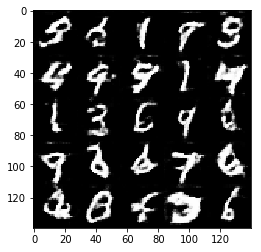

Epoch 2/2... Discriminator Loss: 0.8712... Generator Loss: 1.0509
Epoch 2/2... Discriminator Loss: 0.8581... Generator Loss: 1.1577
Epoch 2/2... Discriminator Loss: 0.8830... Generator Loss: 1.4147
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 0.5481
Epoch 2/2... Discriminator Loss: 0.8262... Generator Loss: 1.5107
Epoch 2/2... Discriminator Loss: 1.0218... Generator Loss: 0.9002
Epoch 2/2... Discriminator Loss: 0.9176... Generator Loss: 0.9913
Epoch 2/2... Discriminator Loss: 1.2874... Generator Loss: 0.5772
Epoch 2/2... Discriminator Loss: 0.9561... Generator Loss: 0.9800
Epoch 2/2... Discriminator Loss: 1.0192... Generator Loss: 0.8801


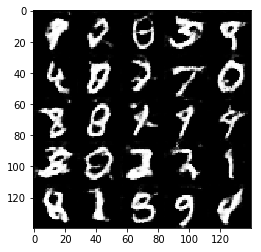

Epoch 2/2... Discriminator Loss: 0.9319... Generator Loss: 1.1955
Epoch 2/2... Discriminator Loss: 0.8636... Generator Loss: 1.1658
Epoch 2/2... Discriminator Loss: 0.7531... Generator Loss: 1.3779
Epoch 2/2... Discriminator Loss: 1.4296... Generator Loss: 0.4836
Epoch 2/2... Discriminator Loss: 0.8951... Generator Loss: 1.2315
Epoch 2/2... Discriminator Loss: 1.0164... Generator Loss: 1.2386
Epoch 2/2... Discriminator Loss: 0.9684... Generator Loss: 0.9701
Epoch 2/2... Discriminator Loss: 0.8146... Generator Loss: 1.1712
Epoch 2/2... Discriminator Loss: 1.0289... Generator Loss: 0.8434
Epoch 2/2... Discriminator Loss: 1.4279... Generator Loss: 0.4660


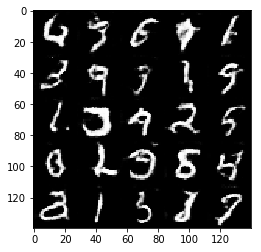

Epoch 2/2... Discriminator Loss: 0.9099... Generator Loss: 1.0636
Epoch 2/2... Discriminator Loss: 1.0124... Generator Loss: 0.8283
Epoch 2/2... Discriminator Loss: 0.8857... Generator Loss: 1.0808
Epoch 2/2... Discriminator Loss: 0.9314... Generator Loss: 1.0976
Epoch 2/2... Discriminator Loss: 0.8471... Generator Loss: 1.2182
Epoch 2/2... Discriminator Loss: 0.8552... Generator Loss: 1.2939
Epoch 2/2... Discriminator Loss: 1.0762... Generator Loss: 0.7764


In [84]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4420... Generator Loss: 20.9890
Epoch 1/1... Discriminator Loss: 0.5784... Generator Loss: 7.1086
Epoch 1/1... Discriminator Loss: 0.8540... Generator Loss: 1.7036
Epoch 1/1... Discriminator Loss: 2.1511... Generator Loss: 0.8323
Epoch 1/1... Discriminator Loss: 0.6016... Generator Loss: 4.9463
Epoch 1/1... Discriminator Loss: 0.6057... Generator Loss: 1.9896
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.8909
Epoch 1/1... Discriminator Loss: 0.6580... Generator Loss: 4.1486
Epoch 1/1... Discriminator Loss: 0.5608... Generator Loss: 2.1386
Epoch 1/1... Discriminator Loss: 0.5856... Generator Loss: 1.7740


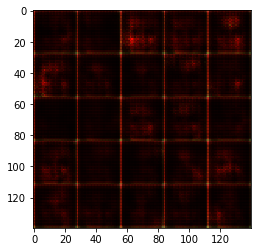

Epoch 1/1... Discriminator Loss: 0.5217... Generator Loss: 2.2252
Epoch 1/1... Discriminator Loss: 0.4841... Generator Loss: 3.9823
Epoch 1/1... Discriminator Loss: 0.9762... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.6549... Generator Loss: 0.9669
Epoch 1/1... Discriminator Loss: 1.7911... Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 1.7046... Generator Loss: 0.4628
Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 1.1936
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.5094
Epoch 1/1... Discriminator Loss: 1.1161... Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 2.2390... Generator Loss: 0.2339


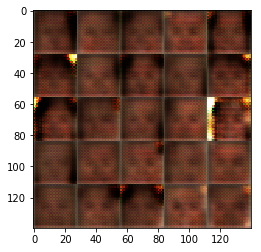

Epoch 1/1... Discriminator Loss: 2.2273... Generator Loss: 3.3119
Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 0.9614
Epoch 1/1... Discriminator Loss: 1.5423... Generator Loss: 0.7387
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.6227... Generator Loss: 0.4376
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.9197
Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 0.8640
Epoch 1/1... Discriminator Loss: 1.2024... Generator Loss: 1.1565
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.7155
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 1.1267


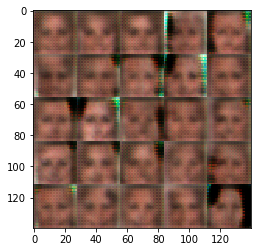

Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 0.9368
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 2.2906
Epoch 1/1... Discriminator Loss: 1.2148... Generator Loss: 0.9601
Epoch 1/1... Discriminator Loss: 2.1641... Generator Loss: 3.2776
Epoch 1/1... Discriminator Loss: 1.4658... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.7227... Generator Loss: 0.4375
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 1.2818
Epoch 1/1... Discriminator Loss: 1.1282... Generator Loss: 0.8097


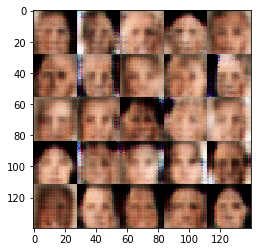

Epoch 1/1... Discriminator Loss: 1.8682... Generator Loss: 0.2839
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.9130... Generator Loss: 2.1897
Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 0.9765
Epoch 1/1... Discriminator Loss: 1.4894... Generator Loss: 1.2864
Epoch 1/1... Discriminator Loss: 0.9072... Generator Loss: 0.9538
Epoch 1/1... Discriminator Loss: 2.7999... Generator Loss: 2.5148
Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.7198
Epoch 1/1... Discriminator Loss: 1.4777... Generator Loss: 0.5106


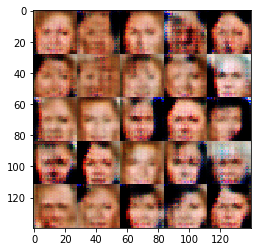

Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 1.3608
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 1.1739
Epoch 1/1... Discriminator Loss: 1.5029... Generator Loss: 1.0570
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 1.0246
Epoch 1/1... Discriminator Loss: 1.2531... Generator Loss: 0.5928
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 1.1572
Epoch 1/1... Discriminator Loss: 1.1994... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.4564... Generator Loss: 0.5276
Epoch 1/1... Discriminator Loss: 0.7623... Generator Loss: 1.4467
Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 0.4756


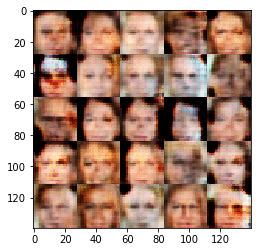

Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.5749
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 0.9904
Epoch 1/1... Discriminator Loss: 1.9280... Generator Loss: 0.2592
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 1.1670
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 1.1634
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.8831
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 1.3121
Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 1.0487
Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.8745


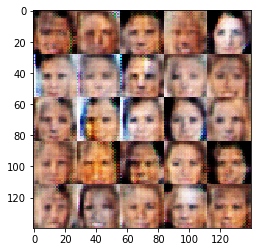

Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.8176
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.7325... Generator Loss: 0.3661
Epoch 1/1... Discriminator Loss: 1.5766... Generator Loss: 0.4377
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.6579
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.7553
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 0.9297... Generator Loss: 1.3043
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 1.2569
Epoch 1/1... Discriminator Loss: 1.2014... Generator Loss: 1.0344


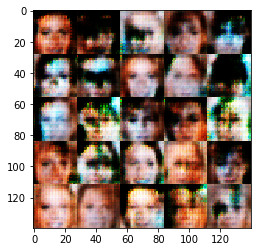

Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.1055... Generator Loss: 0.7511
Epoch 1/1... Discriminator Loss: 1.0643... Generator Loss: 0.9716
Epoch 1/1... Discriminator Loss: 1.8457... Generator Loss: 2.0033
Epoch 1/1... Discriminator Loss: 1.2381... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.8125... Generator Loss: 1.4887
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.5650
Epoch 1/1... Discriminator Loss: 0.9304... Generator Loss: 0.9866


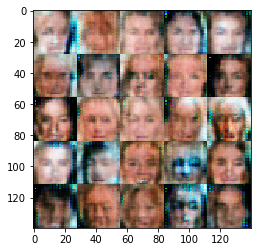

Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 1.7372
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 1.2661
Epoch 1/1... Discriminator Loss: 0.9750... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 0.9379
Epoch 1/1... Discriminator Loss: 1.5172... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.8877
Epoch 1/1... Discriminator Loss: 1.0452... Generator Loss: 0.9234
Epoch 1/1... Discriminator Loss: 1.6210... Generator Loss: 0.4697


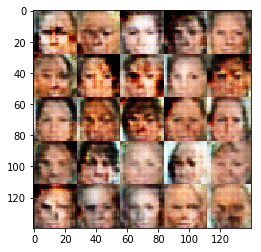

Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 0.8887
Epoch 1/1... Discriminator Loss: 1.5632... Generator Loss: 0.3935
Epoch 1/1... Discriminator Loss: 1.4955... Generator Loss: 0.4457
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.5611
Epoch 1/1... Discriminator Loss: 1.5245... Generator Loss: 0.4054
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 1.4322
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 0.9584
Epoch 1/1... Discriminator Loss: 1.2255... Generator Loss: 0.6572
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 1.1991... Generator Loss: 1.0348


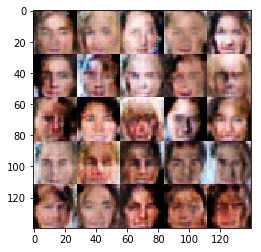

Epoch 1/1... Discriminator Loss: 1.5273... Generator Loss: 0.9138


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.